In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 구글검색 : "Online Retail dataset uci"

In [3]:
df = pd.read_excel('Online Retail.xlsx')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
df = df[df['CustomerID'].notnull()]

In [16]:
df = df[df['Quantity'] > 0]

In [17]:
df = df[df['UnitPrice'] > 0]

In [19]:
df['Country'].value_counts()

United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

In [21]:
df = df[df['Country'] == 'United Kingdom']

In [23]:
df.shape

(354321, 8)

In [25]:
# RFM기반 segmentation :클러스터링..
# R - recency
# F - frequency
# M - moneytary value

In [26]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# recency
# 현재시점  -  가장 최근 구매시점 

In [ ]:
# frequency
# grouby('customer_id') -> count

In [ ]:
# moneytary value
# purchase amount = quantity * unit price
# grouby('customer_id') -> purchase amount sum

In [28]:
df['sales_amount'] = df['Quantity'] * df['UnitPrice']
df['CustomerID'] = df['CustomerID'].astype(int)

In [29]:
aggregation = {'InvoiceDate' : 'max',
              'InvoiceNo' : 'count',
              'sales_amount' : 'sum'}

cust_df = df.groupby('CustomerID').agg(aggregation)
cust_df.head()

,InvoiceDate,InvoiceNo,sales_amount
CustomerID,,,
12346,2011-01-18 10:01:00,1,77183.60
12747,2011-12-07 14:34:00,103,4196.01
12748,2011-12-09 12:20:00,4595,33719.73
12749,2011-12-06 09:56:00,199,4090.88
12820,2011-12-06 15:12:00,59,942.34


In [30]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3920 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   InvoiceDate   3920 non-null   datetime64[ns]
 1   InvoiceNo     3920 non-null   int64         
 2   sales_amount  3920 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 122.5 KB


In [32]:
cust_df['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [35]:
import datetime as dt

cust_df['recency'] = dt.datetime(2011, 12, 10) - cust_df['InvoiceDate']

In [40]:
cust_df['recency'] = cust_df['recency'].apply(lambda x: x.days+1)

In [41]:
cust_df.head()

,InvoiceDate,InvoiceNo,sales_amount,recency
CustomerID,,,,
12346,2011-01-18 10:01:00,1,77183.60,326
12747,2011-12-07 14:34:00,103,4196.01,3
12748,2011-12-09 12:20:00,4595,33719.73,1
12749,2011-12-06 09:56:00,199,4090.88,4
12820,2011-12-06 15:12:00,59,942.34,4


In [42]:
cust_df = cust_df.drop('InvoiceDate', axis=1)

In [43]:
cust_df.rename(columns = {'InvoiceNo':'Frequency', 'sales_amount':'Monetary'}, inplace=True)
cust_df.head()

,Frequency,Monetary,recency
CustomerID,,,
12346,1,77183.60,326
12747,103,4196.01,3
12748,4595,33719.73,1
12749,199,4090.88,4
12820,59,942.34,4


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

scaler = StandardScaler()
x_features = scaler.fit_transform(cust_df)
x_features[:5]

array([[-0.41044983, 10.06690642,  2.3438109 ],
       [ 0.05791145,  0.31163688, -0.90174217],
       [20.68417459,  4.25767546, -0.92183848],
       [ 0.49872206,  0.29758556, -0.89169402],
       [-0.14412675, -0.12323743, -0.89169402]])

In [47]:
km = KMeans(n_clusters=3, random_state=111)
labels = km.fit_predict(x_features)
cust_df['cluster_label'] = labels

In [48]:
cust_df.head()

,Frequency,Monetary,recency,cluster_label
CustomerID,,,,
12346,1,77183.60,326,2
12747,103,4196.01,3,0
12748,4595,33719.73,1,2
12749,199,4090.88,4,0
12820,59,942.34,4,0


In [49]:
silhouette_score(x_features, labels)

0.5923691942714455

In [50]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [51]:
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

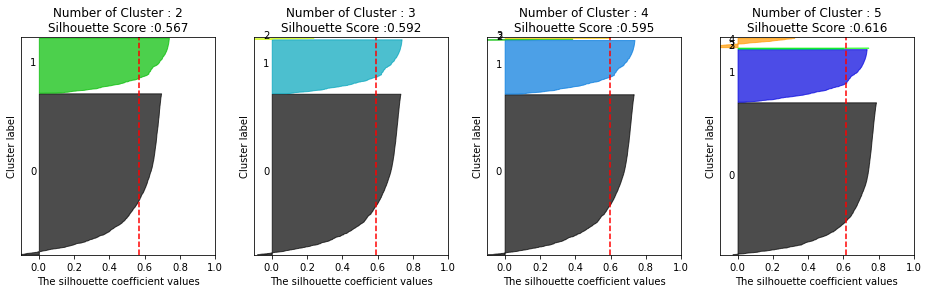

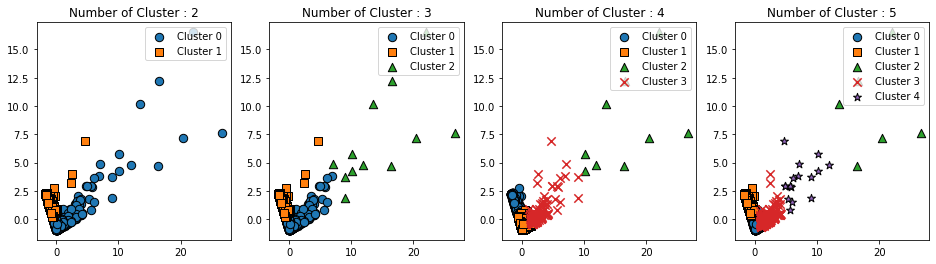

In [52]:
visualize_silhouette([2,3,4,5], x_features)
visualize_kmeans_plot_multi([2,3,4,5], x_features)

(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <a list of 10 Patch objects>)

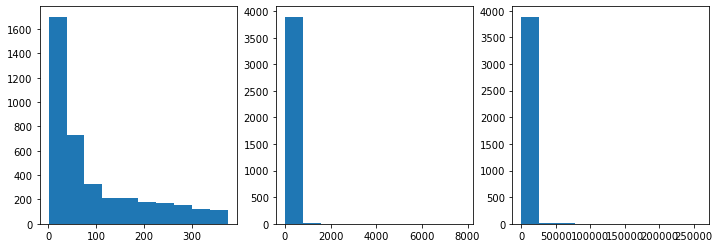

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.hist(cust_df['recency'])
ax2.hist(cust_df['Frequency'])
ax3.hist(cust_df['Monetary'])

In [57]:
cust_df['recency_log'] = np.log1p(cust_df['recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

In [58]:
x_features = cust_df[['recency_log','Frequency_log','Monetary_log']]

In [59]:
x_features_scaled = StandardScaler().fit_transform(x_features)

In [60]:
km = KMeans(n_clusters=3, random_state=111)
labels = km.fit_predict(x_features)
cust_df['cluster_label'] = labels

In [61]:
silhouette_score(x_features, labels)

0.3040321797067897

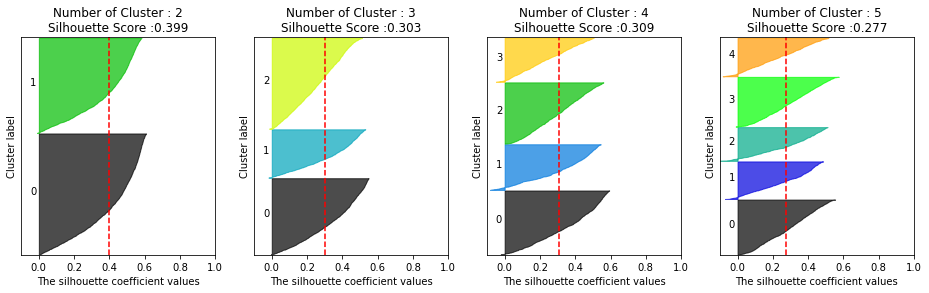

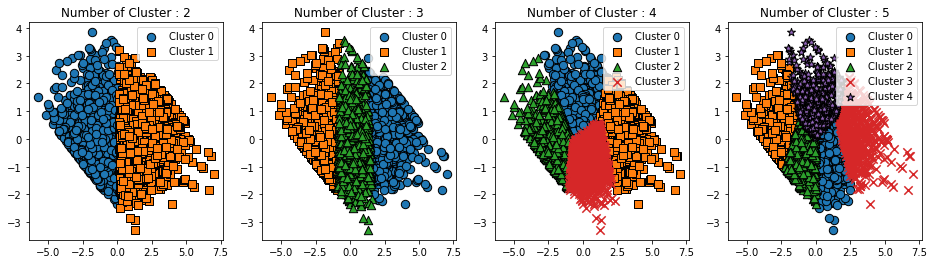

In [62]:
visualize_silhouette([2,3,4,5], x_features)
visualize_kmeans_plot_multi([2,3,4,5], x_features)